In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.utils import resample
from keras.optimizers.legacy import Adam

In [2]:
df = pd.read_csv('../../creditcard.csv')

In [3]:
legit=df[df.Class==0]
fraud = df[df.Class == 1]

In [4]:
fraud = resample(fraud, replace=True, n_samples=len(legit), random_state=42)

In [5]:
df1 = pd.concat([legit, fraud], axis=0)

In [6]:
df1['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [7]:
x=df1.drop(['Class','Time'],axis=1)
y=df1['Class']

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
print(x_train.shape,y_train.shape)

(426472, 29) (426472,)


In [11]:
print(x_test.shape,y_test.shape)

(142158, 29) (142158,)


In [12]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [13]:
model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
epc=10
bs=64

In [19]:
modelfit=model.fit(x_train, y_train, epochs=epc, batch_size=bs, validation_data=(x_test, y_test))

Epoch 1/10
6664/6664 [==============================] - 31s 5ms/step - loss: 0.0370 - accuracy: 0.9870 - val_loss: 0.0246 - val_accuracy: 0.9929
Epoch 2/10
6664/6664 [==============================] - 34s 5ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 3/10
6664/6664 [==============================] - 34s 5ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0120 - val_accuracy: 0.9974
Epoch 4/10
6664/6664 [==============================] - 34s 5ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0175 - val_accuracy: 0.9944
Epoch 5/10
6664/6664 [==============================] - 36s 5ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0082 - val_accuracy: 0.9987
Epoch 6/10
6664/6664 [==============================] - 44s 7ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0162 - val_accuracy: 0.9938
Epoch 7/10
6664/6664 [==============================] - 51s 8ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0122 - val_ac

In [20]:
model.save("CNN_Upsampling_model.keras")

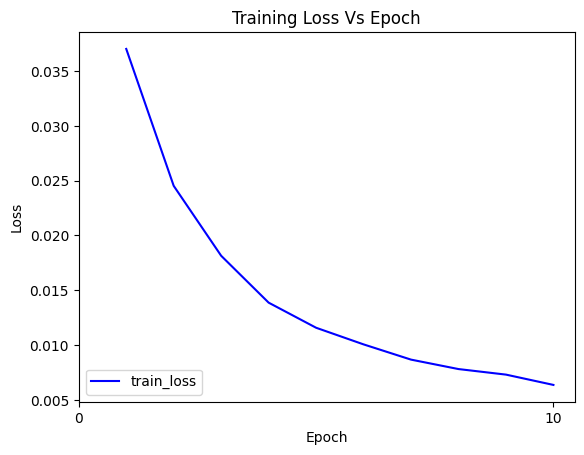

In [21]:
myarr=np.arange(0, epc, 10)
myarr=np.append(myarr,epc)

plt.plot(np.arange(1,epc+1), modelfit.history["loss"], label="train_loss", color='blue')
plt.title("Training Loss Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

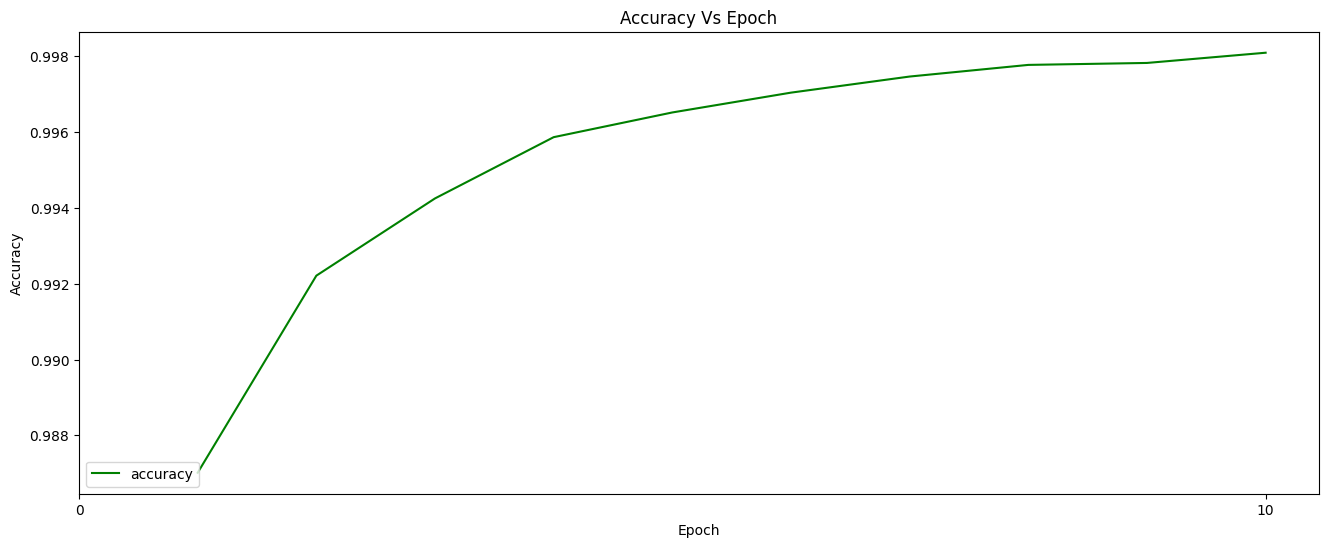

In [22]:
plt.plot(np.arange(1, epc+1), modelfit.history["accuracy"], label="accuracy", color='green')
plt.title("Accuracy Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [23]:
y_train_pred=model.predict(x_train)

13328/13328 [==============================] - 33s 2ms/step


In [24]:
y_train_pred=(y_train_pred>0.5).astype(int)

In [25]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))

Accuracy on Training Data :  0.9961638747678628


In [26]:
print("Classification Report :\n",classification_report(y_train_pred,y_train))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    214230
           1       0.99      1.00      1.00    212242

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



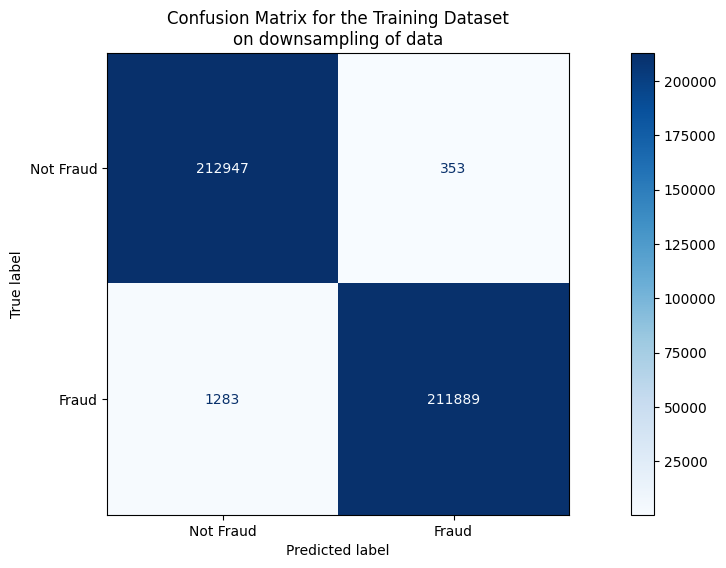

In [27]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset\non downsampling of data')
plt.show();